#Base de Dados: Enem2021, Alunos de Fortaleza. 

Usando os notas das competência da Redação com previsores para Média Final do Aluno no Enem.

Regressão Linear

In [ ]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import sklearn.model_selection as ms
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Variaveis selecionadas e criada no banco de dados.

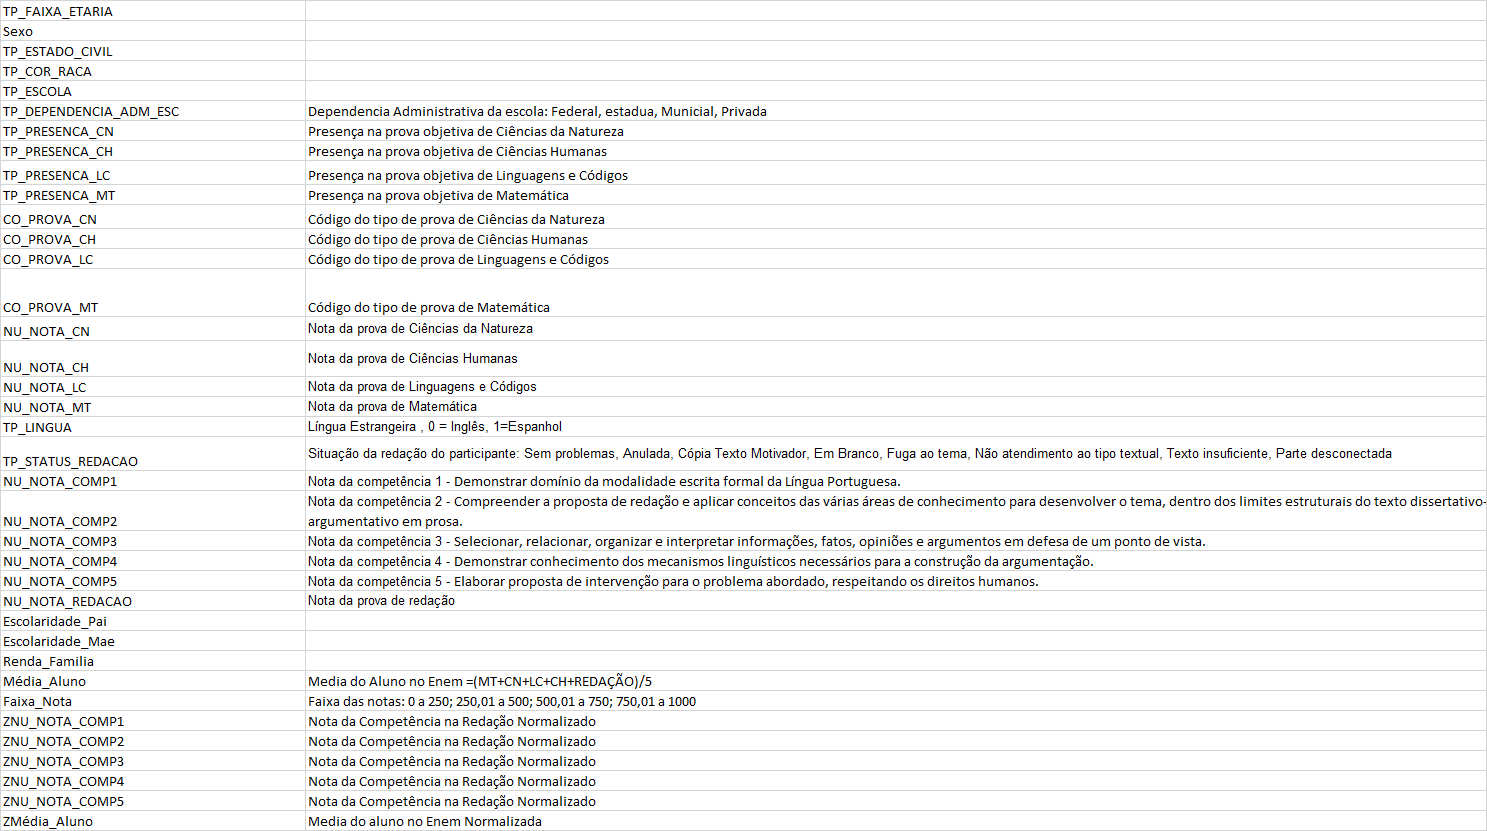

In [ ]:
#Os dados foram tratados no SPSS : Eliminação de dados faltantes, normalização das variaveis que entraram no modelo de regressão
#O banco de dados é o resultado do enem 2021 , endereço https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

Enem2021 = pd.read_excel('/content/drive/MyDrive/Enem_Fortaleza_2021_DEEP_2_2.xlsx') #Baixando o Banco de dados para o google colab
Enem2021

,TP_FAIXA_ETARIA,Sexo,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,...,Escolaridade_Mae,Renda_Familia,Média_Aluno,Faixa_Nota,ZNU_NOTA_COMP1,ZNU_NOTA_COMP2,ZNU_NOTA_COMP3,ZNU_NOTA_COMP4,ZNU_NOTA_COMP5,ZMédia_Aluno
0,5.0,0.0,1.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,...,2.0,3.0,442.78,2.0,0.074853,-0.342893,-0.351669,-0.639014,-1.506626,-0.854322
1,3.0,1.0,0.0,1.0,3.0,4.0,1.0,1.0,1.0,1.0,...,4.0,2.0,684.98,3.0,0.601425,1.326215,0.670135,0.753398,1.319696,1.586417
2,3.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,...,3.0,2.0,412.88,2.0,0.074853,-0.342893,0.159233,-0.174877,-1.820662,-1.155636
3,3.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,4.0,2.0,504.62,3.0,-0.978291,-0.342893,-0.351669,-0.174877,0.377589,-0.231138
4,12.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,5.0,5.0,538.54,3.0,0.601425,-0.342893,0.159233,-0.174877,0.063553,0.110687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16583,4.0,1.0,1.0,2.0,3.0,4.0,1.0,1.0,1.0,1.0,...,5.0,3.0,567.92,3.0,0.074853,-0.342893,0.159233,0.753398,0.691625,0.406760
16584,3.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,1.0,1.0,...,7.0,6.0,429.66,2.0,-0.978291,-0.342893,0.159233,-0.174877,0.691625,-0.986537
16585,3.0,0.0,1.0,1.0,3.0,4.0,1.0,1.0,1.0,1.0,...,4.0,6.0,669.42,3.0,0.601425,0.908938,1.691939,0.753398,1.319696,1.429613
16586,3.0,1.0,1.0,3.0,3.0,4.0,1.0,1.0,1.0,1.0,...,4.0,17.0,457.18,2.0,0.074853,-0.342893,0.159233,0.753398,1.319696,-0.709208


In [ ]:
Enem2021.info() #Verificando se existe dados faltantes e o tipo de variaveis 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16588 entries, 0 to 16587
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TP_FAIXA_ETARIA         16588 non-null  float64
 1   Sexo                    16588 non-null  float64
 2   TP_ESTADO_CIVIL         16588 non-null  float64
 3   TP_COR_RACA             16588 non-null  float64
 4   TP_ESCOLA               16588 non-null  float64
 5   TP_DEPENDENCIA_ADM_ESC  16588 non-null  float64
 6   TP_PRESENCA_CN          16588 non-null  float64
 7   TP_PRESENCA_CH          16588 non-null  float64
 8   TP_PRESENCA_LC          16588 non-null  float64
 9   TP_PRESENCA_MT          16588 non-null  float64
 10  CO_PROVA_CN             16588 non-null  float64
 11  CO_PROVA_CH             16588 non-null  float64
 12  CO_PROVA_LC             16588 non-null  float64
 13  CO_PROVA_MT             16588 non-null  float64
 14  NU_NOTA_CN              16588 non-null

O banco de dados é constituido por 37 variaveis, mas em nosso trabalho usaremos ZNU_NOTA_COMP1  , ZNU_NOTA_COMP2, ZNU_NOTA_COMP3, ZNU_NOTA_COMP4,   ZNU_NOTA_COMP5, ZMédia_Aluno, ou seja , as variaveis NU_NOTA_COMP1 ,NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4 , NU_NOTA_COMP5 , Média_Aluno normalizadas respectivamente. Portanto formaremos um novo banco de dados com essas variaveis, mundando seus nomes. 

Descrevendo as Competências na Redação

Competência 1: Demonstrar domínio da modalidade escrita formal da língua portuguesa. (Nota de zero a 200)

Competência 2: Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa. (Nota de zero a 200)

Competência 3: Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista. (Nota de zero a 200)

Competência 4: Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação. (Nota de zero a 200)

Competência 5: Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos. (Nota de zero a 200)

Veja mais sobre "As 5 competências da redação do Enem" em: https://brasilescola.uol.com.br/redacao/as-5-competencias-da-redacao-do-enem.htm

In [ ]:
# Variáveis que entraram no modelo.
Enem2021_PN=Enem2021[['NU_NOTA_COMP1' ,'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4' , 'NU_NOTA_COMP5' , 'Média_Aluno']]
Enem2021_PN

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Média_Aluno
0,120.0,120.0,100.0,100.0,20.0,442.78
1,140.0,200.0,140.0,160.0,200.0,684.98
2,120.0,120.0,120.0,120.0,0.0,412.88
3,80.0,120.0,100.0,120.0,140.0,504.62
4,140.0,120.0,120.0,120.0,120.0,538.54
...,...,...,...,...,...,...
16583,120.0,120.0,120.0,160.0,160.0,567.92
16584,80.0,120.0,120.0,120.0,160.0,429.66
16585,140.0,180.0,180.0,160.0,200.0,669.42
16586,120.0,120.0,120.0,160.0,200.0,457.18


In [ ]:
#Estatistica descritva das variaveis antes de normaliza-las 
Enem2021_PN.describe()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Média_Aluno
count,16588.000000,16588.000000,16588.000000,16588.000000,16588.000000,16588.000000
mean,117.156981,136.434772,113.766578,127.535568,115.952496,527.556293
std,37.981509,47.929804,39.146455,43.090681,63.687007,99.232217
min,0.000000,0.000000,0.000000,0.000000,0.000000,72.020000
25%,100.000000,120.000000,100.000000,120.000000,80.000000,455.400000
50%,120.000000,120.000000,120.000000,120.000000,120.000000,516.280000
75%,140.000000,180.000000,140.000000,160.000000,160.000000,594.665000
max,200.000000,200.000000,200.000000,200.000000,200.000000,840.460000


## Padronizando e Renomeando as Variáveis:

NU_NOTA_COMP1 ,	NU_NOTA_COMP2 ,	NU_NOTA_COMP3 ,	NU_NOTA_COMP4 ,	NU_NOTA_COMP5 ,	Média_Aluno

In [ ]:
Enem2021_PN['Competencia_1N']=Enem2021_PN['NU_NOTA_COMP1'].apply(lambda x: (x-Enem2021_PN['NU_NOTA_COMP1'].mean())/(Enem2021_PN['NU_NOTA_COMP1'].std()))
Enem2021_PN['Competencia_2N']=Enem2021_PN['NU_NOTA_COMP2'].apply(lambda x: (x-Enem2021_PN['NU_NOTA_COMP2'].mean())/(Enem2021_PN['NU_NOTA_COMP2'].std()))
Enem2021_PN['Competencia_3N']=Enem2021_PN['NU_NOTA_COMP3'].apply(lambda x: (x-Enem2021_PN['NU_NOTA_COMP3'].mean())/(Enem2021_PN['NU_NOTA_COMP3'].std()))
Enem2021_PN['Competencia_4N']=Enem2021_PN['NU_NOTA_COMP4'].apply(lambda x: (x-Enem2021_PN['NU_NOTA_COMP4'].mean())/(Enem2021_PN['NU_NOTA_COMP4'].std()))
Enem2021_PN['Competencia_5N']=Enem2021_PN['NU_NOTA_COMP5'].apply(lambda x: (x-Enem2021_PN['NU_NOTA_COMP5'].mean())/(Enem2021_PN['NU_NOTA_COMP5'].std()))
Enem2021_PN['Média_AlunoN']=Enem2021_PN['Média_Aluno'].apply(lambda x: (x-Enem2021_PN['Média_Aluno'].mean())/(Enem2021_PN['Média_Aluno'].std()))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

 Selecionando as Variáveis para o Modelo.

In [ ]:
Enem2021_Fortaleza=Enem2021_PN[['Competencia_1N','Competencia_2N','Competencia_3N','Competencia_4N','Competencia_5N','Média_AlunoN']]
Enem2021_Fortaleza

,Competencia_1N,Competencia_2N,Competencia_3N,Competencia_4N,Competencia_5N,Média_AlunoN
0,0.074853,-0.342893,-0.351669,-0.639014,-1.506626,-0.854322
1,0.601425,1.326215,0.670135,0.753398,1.319696,1.586417
2,0.074853,-0.342893,0.159233,-0.174877,-1.820662,-1.155636
3,-0.978291,-0.342893,-0.351669,-0.174877,0.377589,-0.231138
4,0.601425,-0.342893,0.159233,-0.174877,0.063553,0.110687
...,...,...,...,...,...,...
16583,0.074853,-0.342893,0.159233,0.753398,0.691625,0.406760
16584,-0.978291,-0.342893,0.159233,-0.174877,0.691625,-0.986537
16585,0.601425,0.908938,1.691939,0.753398,1.319696,1.429613
16586,0.074853,-0.342893,0.159233,0.753398,1.319696,-0.709208


In [ ]:
#Correlação entre as variáveis.
Enem2021_Fortaleza.corr()

,Competencia_1N,Competencia_2N,Competencia_3N,Competencia_4N,Competencia_5N,Média_AlunoN
Competencia_1N,1.000000,0.778171,0.845294,0.863451,0.678615,0.768564
Competencia_2N,0.778171,1.000000,0.843733,0.818109,0.711184,0.762259
Competencia_3N,0.845294,0.843733,1.000000,0.873002,0.731526,0.794176
Competencia_4N,0.863451,0.818109,0.873002,1.000000,0.740851,0.801080
Competencia_5N,0.678615,0.711184,0.731526,0.740851,1.000000,0.788181
Média_AlunoN,0.768564,0.762259,0.794176,0.801080,0.788181,1.000000


In [ ]:
#Regressores ou Variáveis Independentes
X_regressores=Enem2021_Fortaleza.iloc[:,0:5].values
X_regressores

array([[ 0.07485272, -0.34289254, -0.35166858, -0.63901445, -1.50662592],
       [ 0.60142474,  1.32621507,  0.67013531,  0.75339798,  1.31969625],
       [ 0.07485272, -0.34289254,  0.15923336, -0.17487697, -1.82066172],
       ...,
       [ 0.60142474,  0.90893817,  1.6919392 ,  0.75339798,  1.31969625],
       [ 0.07485272, -0.34289254,  0.15923336,  0.75339798,  1.31969625],
       [ 1.12799677,  1.32621507,  1.18103726,  1.21753546,  0.69162465]])

In [ ]:
#Variavel Dependente
Y_Dependente=Enem2021_Fortaleza.iloc[:,5].values
Y_Dependente

array([-0.85432227,  1.58641732, -1.1556357 , ...,  1.42961341,
       -0.70920811,  1.38890082])

In [ ]:
#Divisão do danco de dados em teste e Treino
from sklearn.model_selection import train_test_split
X_regressores_treinamento, X_regressores_teste, Y_Dependente_treinamento, Y_Dependente__teste = train_test_split(X_regressores, Y_Dependente, test_size = 0.3, random_state = 0)

In [ ]:
X_regressores_treinamento


array([[-1.50486337, -0.34289254, -0.35166858, -1.10315193, -1.82066172],
       [-0.97829134,  0.49166126, -0.86257053, -1.10315193, -1.82066172],
       [-3.08457945, -2.84655396, -2.90617831, -2.95970185, -1.82066172],
       ...,
       [-0.97829134, -0.34289254, -0.35166858, -1.10315193, -0.25048274],
       [ 0.60142474,  1.32621507,  0.15923336,  0.75339798,  1.00566045],
       [ 0.60142474,  0.49166126,  0.15923336, -0.17487697,  0.69162465]])

In [ ]:
column_names=["Competencia_1N","Competencia_2N","Competencia_3N","Competencia_4N","Competencia_5N"]
X_regressores_treinamentoD=pd.DataFrame(X_regressores_treinamento,columns = column_names) 
X_regressores_treinamentoD


,Competencia_1N,Competencia_2N,Competencia_3N,Competencia_4N,Competencia_5N
0,-1.504863,-0.342893,-0.351669,-1.103152,-1.820662
1,-0.978291,0.491661,-0.862571,-1.103152,-1.820662
2,-3.084579,-2.846554,-2.906178,-2.959702,-1.820662
3,-0.978291,-0.342893,-0.351669,-1.567289,-1.192590
4,0.074853,-0.342893,0.159233,-0.174877,-0.564519
...,...,...,...,...,...
11606,1.127997,0.074384,0.670135,1.217535,0.691625
11607,0.074853,-0.342893,0.159233,-0.174877,0.691625
11608,-0.978291,-0.342893,-0.351669,-1.103152,-0.250483
11609,0.601425,1.326215,0.159233,0.753398,1.005660


In [ ]:
#Tamanho dos conjuntos de treino e teste.
X_regressores_treinamento.shape, X_regressores_teste.shape

((11611, 5), (4977, 5))

In [ ]:
#Modelo de Regressão Lienar, Treinando o modelo.
from sklearn.linear_model import LinearRegression
regressor_multiplo_Enem2021_Fortaleza = LinearRegression()
regressor_multiplo_Enem2021_Fortaleza.fit(X_regressores_treinamento, Y_Dependente_treinamento)

LinearRegression()

## Nosso modelo será:

MediaFinalAluno= a + b * Competencia_1 + c * Competencia_2 + d * Competencia_3 + e * Competencia_4 + f * Competencia_5 + erro

In [ ]:
# exibindo o valor " a "
regressor_multiplo_Enem2021_Fortaleza.intercept_

-0.0003125902598163687

In [ ]:
#Exibindo os valores b, c, d, e , f da regressão
regressor_multiplo_Enem2021_Fortaleza.coef_

array([0.15992347, 0.11398146, 0.15195756, 0.1704258 , 0.35928961])

## Nossa Regressão:

MediaFinalAluno= -0.0003125902598466704 + 0.15992347 * Competencia_1 + 0.11398146 * Competencia_2 + 0.15195756 * Competencia_3 + 0.1704258 * Competencia_4 + 0.35928961 * Competencia_5 + erro

A competência 5 tem um impacto maior, entre as variáveis preditoras, na média final do aluno. A variação de uma escore nela aumenta 0,35 na  média final.  Enquanto as outras competências com a mesma variação tem metade do impacto na média final. 

## Pressupostos do Modelo 

1- Normalidade dos resíduos

2- Homoscedasticidade dos resíduos

3- Linearidade dos coeficientes

4- Ausência de autocorrelação serial entre os resíduos

5- Multicolinearidade entre as variáveis independentes.


## Avaliação do Modelo

1- MSE - Erro Quadrado Médio

2- RMSE - Raiz quadrada do erro quadrático médio

3- MAE - Erro Médio Absoluto

4- Coeficiente de Determinação R2

5- R2 ajustado

6- Estatística t

1- MSE - Erro Quadrado Médio


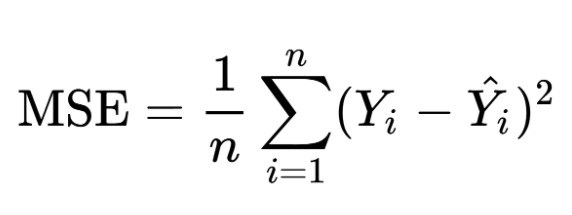


In [ ]:
# MSE no Teste 
from sklearn.metrics import mean_squared_error
y_pred1 =  regressor_multiplo_Enem2021_Fortaleza.predict(X_regressores_teste)
MSE_Teste = mean_squared_error(Y_Dependente__teste, y_pred1)
print(MSE_Teste)

0.2460589770058593


In [ ]:
# MSE no Treino
y_pred2 =  regressor_multiplo_Enem2021_Fortaleza.predict(X_regressores_treinamento)
MSE_Treino = mean_squared_error(Y_Dependente_treinamento, y_pred2)
print(MSE_Treino)

0.2502537259756448


2- RMSE - Raiz quadrada do erro quadrático médio

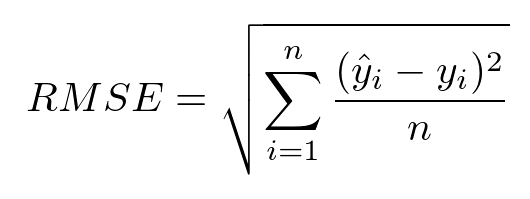

In [ ]:
# RMSE Teste
RMSE_Teste =np.sqrt( mean_squared_error(Y_Dependente__teste, y_pred1))
print(RMSE_Teste)


0.49604332170271104


In [ ]:
# RMSE Treino
RMSE_Treino =np.sqrt( mean_squared_error(Y_Dependente_treinamento, y_pred2))
print(RMSE_Treino)

0.5002536616314216


3- MAE - Erro Médio Absoluto

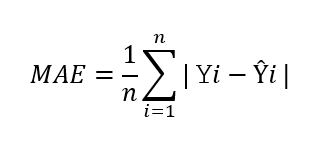

In [ ]:
# MAE Teste
from sklearn.metrics import mean_absolute_error
MAE_Teste=mean_absolute_error(Y_Dependente__teste, y_pred1)
print(MAE_Teste)

0.39731726426411534


In [ ]:
# MAE Treino
MAE_Treino=mean_absolute_error(Y_Dependente_treinamento, y_pred2)
print(MAE_Treino)

0.39888336451923356


4- Coeficiente de Determinação R2

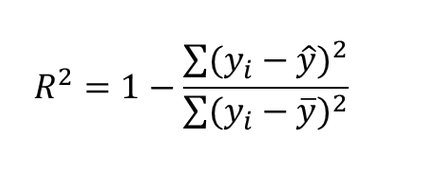

In [ ]:
# R2 Teste
from sklearn.metrics import r2_score
r2_Teste = r2_score(Y_Dependente__teste, y_pred1)
print(r2_Teste)

0.7514092363620951


In [ ]:
# R2 Treino
r2_Treino = r2_score(Y_Dependente_treinamento, y_pred2)
print(r2_Treino)

0.7508079726390686


5- R2 ajustado

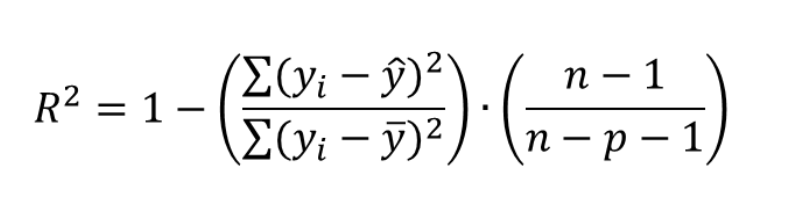

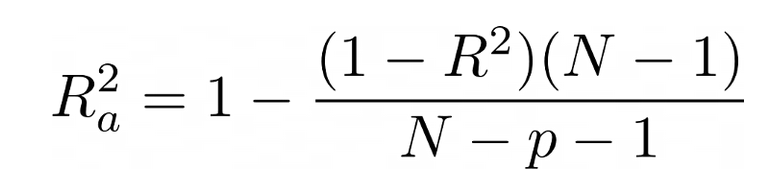

In [ ]:
# R2 Ajustado no Teste
# p= Número de variáveis independentes, os regressores, ou variaveis de entrada. (5)
# n= Número de Observações. (4977)
k=((r2_Teste)**2)*(4977-1)
R2_Ajustado_Teste=1-(k/(4977-5-1))
print(R2_Ajustado_Teste)

0.43481624979288513


In [ ]:
# R2 Ajustado no Treino
# p= Número de variáveis independentes, os regressores, ou variaveis de entrada. (5)
# n= Número de Observações. (11611)
kt=((r2_Treino)**2)*(11611-1)
R2_Ajustado_Treino=1-(kt/(11611-5-1))
print(R2_Ajustado_Treino)

0.43604451333502026


## Métricas do Modelo - Resumo:

1- MSE - Erro Quadrado Médio

2- RMSE - Raiz quadrada do erro quadrático médio

3- MAE - Erro Médio Absoluto

4- Coeficiente de Determinação R2

5- R2 ajustado

In [ ]:
dicionário = {
    'Medidas': ['MSE', ' RMSE ', 'MAE ', 'Coeficiente de Determinação R2', 'R2 ajustado'],
    'Treino': [MSE_Treino, RMSE_Treino, MAE_Treino, r2_Treino, R2_Ajustado_Treino],
    'Teste': [MSE_Teste, RMSE_Teste, MAE_Teste, r2_Teste, R2_Ajustado_Teste]
}

Metricas = pd.DataFrame(dicionário)
Metricas

,Medidas,Treino,Teste
0,MSE,0.250254,0.246059
1,RMSE,0.500254,0.496043
2,MAE,0.398883,0.397317
3,Coeficiente de Determinação R2,0.750808,0.751409
4,R2 ajustado,0.436045,0.434816


Gráfico RMSE x Tamanho do conjunto de treinamento

In [ ]:
def plot_learning_curves(model, X,y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)
  train_erros,val_erros = [], []
  for m in range (1, len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_erros.append(mean_squared_error(y_train_predict,y_train[:m]))
    val_erros.append(mean_squared_error(y_val_predict,y_val))
  font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
  plt.figure(figsize=(15, 10))
  plt.plot(np.sqrt(train_erros),"r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_erros),"b-", linewidth=3, label="val")
  plt.legend(('Conjunto de Treinamento', 'Conjunto de Validação'),loc='upper center', shadow=True)
  plt.xlabel('Tamanho do Conjunto de Treinamento', fontdict=font)
  plt.ylabel('RMSE', fontdict=font)
 

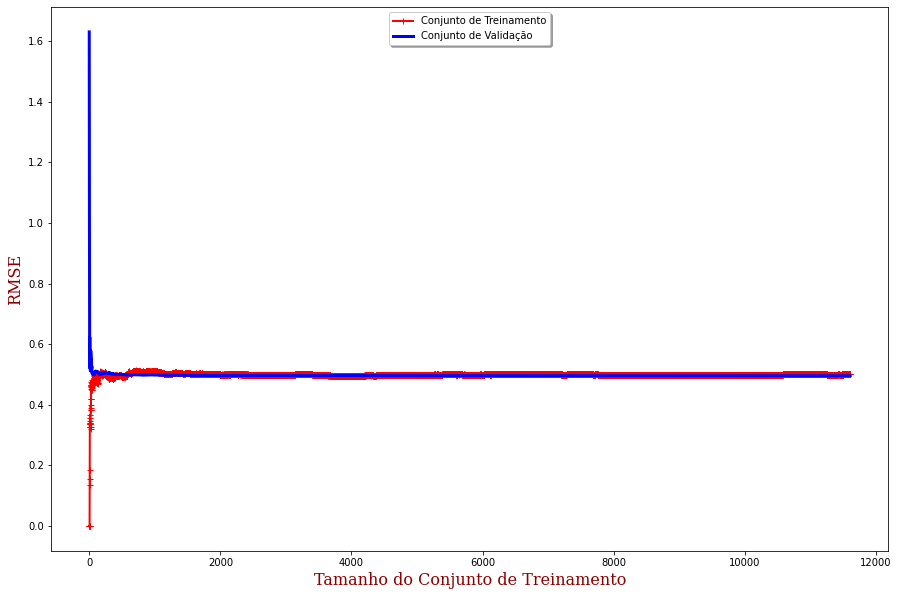

In [ ]:
plot_learning_curves(regressor_multiplo_Enem2021_Fortaleza,X_regressores, Y_Dependente)

## Pressupostos do Modelo 

1- Normalidade dos resíduos

2- Homoscedasticidade dos resíduos

3- Linearidade dos coeficientes

4- Ausência de autocorrelação serial entre os resíduos

5- Multicolinearidade entre as variáveis independentes.

1- Normalidade dos resíduos

Distribuição dos Resíduos/Erros:

In [ ]:
y_pred_treinamento= regressor_multiplo_Enem2021_Fortaleza.predict(X_regressores_treinamento)
erro= Y_Dependente_treinamento - y_pred_treinamento

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


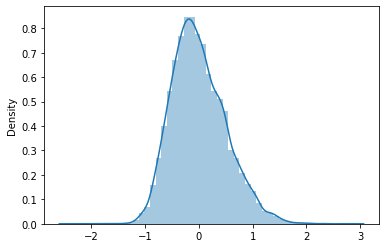

In [ ]:
import seaborn as sns
sns.distplot(erro)

2- Homoscedasticidade dos resíduos

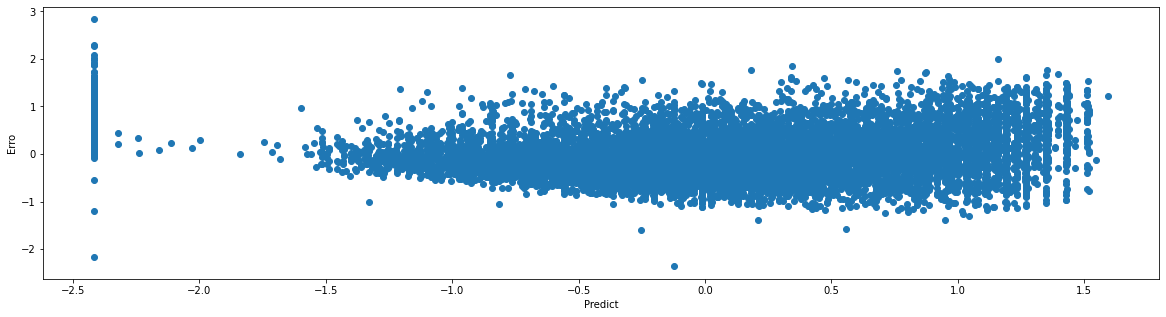

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(y_pred_treinamento, erro , 'o')
plt.xlabel('Predict')
plt.ylabel('Erro')
plt.show()

3- Linearidade dos coeficientes



Garatindo pelo forma de obter a regressão linear

4- Ausência de autocorrelação serial entre os resíduos

 Os valores de dL e dU para α=0,05 (MARÔCO; PINHEIRO, 2014).

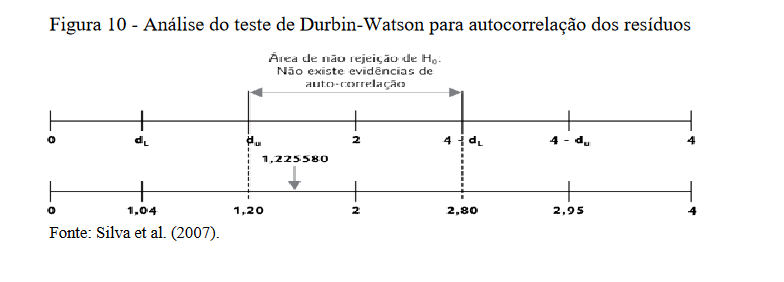

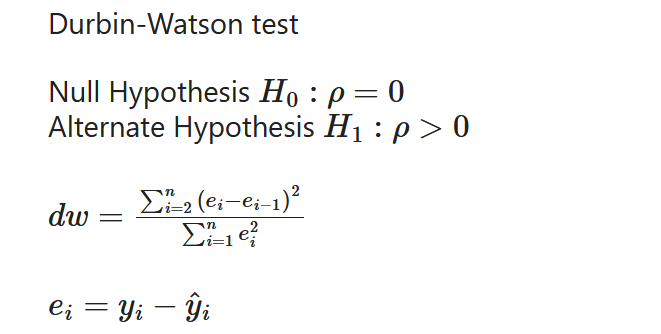

In [ ]:
#y_pred_treinamento, erro
residual_df = pd.DataFrame(erro, columns=["ei"]).reset_index(drop=True)
#residual_df
residual_df['ei_square'] = np.square(residual_df['ei'])
sum_of_squared_residuals = residual_df.sum()["ei_square"]
residual_df['ei_minus_1'] = residual_df['ei'].shift()
residual_df.dropna(inplace=True)
residual_df['ei_sub_ei_minus_1'] = residual_df['ei'] - residual_df['ei_minus_1'] 
residual_df['square_of_ei_sub_ei_minus_1'] = np.square(residual_df['ei_sub_ei_minus_1'])
sum_of_squared_of_difference_residuals = residual_df.sum()["square_of_ei_sub_ei_minus_1"]
sum_of_squared_of_difference_residuals
dw = sum_of_squared_of_difference_residuals/sum_of_squared_residuals
dw


1.9620311062063216

Valor próximo de 2, mostrando a Ausência de autocorrelação serial entre os resíduos (ver figura acima)

In [ ]:
residual_df

,ei,ei_square,ei_minus_1,ei_sub_ei_minus_1,square_of_ei_sub_ei_minus_1
1,-0.024448,0.000598,-0.109784,0.085337,0.007282
2,0.294163,0.086532,-0.024448,0.318610,0.101512
3,-0.183145,0.033542,0.294163,-0.477308,0.227823
4,0.425954,0.181437,-0.183145,0.609100,0.371003
5,0.227350,0.051688,0.425954,-0.198605,0.039444
...,...,...,...,...,...
11606,0.524611,0.275217,0.644173,-0.119562,0.014295
11607,-0.065473,0.004287,0.524611,-0.590084,0.348199
11608,-0.332073,0.110273,-0.065473,-0.266600,0.071076
11609,0.702723,0.493820,-0.332073,1.034796,1.070803


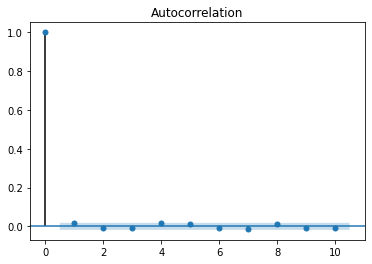

In [ ]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(erro, lags=10 , alpha=0.05)
acf.show()

5- Multicolinearidade entre as variáveis independentes.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculo_vif(dataset):
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Values']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return(vif)                                                                                                                                                       

In [ ]:
features=X_regressores_treinamentoD
calculo_vif(features)

,features,VIF_Values
0,Competencia_1N,4.649167
1,Competencia_2N,4.024472
2,Competencia_3N,6.031793
3,Competencia_4N,6.091498
4,Competencia_5N,2.462093


## Usando  statsmodels

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [ ]:
X_R = Enem2021_Fortaleza.iloc[:,:-1]
Y_R = Enem2021_Fortaleza['Média_AlunoN'].values

In [ ]:
Xc = sm.add_constant(X_R)
modelo = sm.OLS(Y_R, Xc)
modelo_v1 = modelo.fit()
modelo_v1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.000e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:42   Log-Likelihood:                -12005.
No. Observations:               16588   AIC:                         2.402e+04
Df Residuals:                   16582   BIC:                         2.407e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7.893e-16      0.004  -2.04e-13      1.000      -0.008       0.008
Competencia_1N     0.1621      0.008     19.504      0.000       0.146       0.178
Competencia_2N     0.1163      0.008     15.008      0.000       0.101       0.132
Competencia_3N     0.1434      0.009     15.108      0.000       0.125       0.162
Competencia_4N     0.1714      0.010     17.911      0.000       0.153       0.190
Competencia_5N     0.3635      0.006     59.894      0.000       0.352       0.375
==============================================================================
Omnibus:                      619.594   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.231
Skew:                           0.476   Prob(JB):                    6.54e-152
Kurtosis:                       3.316   Cond. No.                         5.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MediaFinalAluno= -0.0003125902598466704 + 0.15992347 * Competencia_1 + 0.11398146 * Competencia_2 + 0.15195756 * Competencia_3 + 0.1704258 * Competencia_4 + 0.35928961 * Competencia_5 + erro

In [ ]:
print(modelo_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.000e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:46   Log-Likelihood:                -12005.
No. Observations:               16588   AIC:                         2.402e+04
Df Residuals:                   16582   BIC:                         2.407e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7.893e-16      0.004  -2.04e